In [1]:
import urllib


query = "'Vipop Lekhachinabutr'"
query = urllib.parse.quote_plus(query) # Format into URL encoding
number_result = 20

In [2]:
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

ua = UserAgent()

google_url = "https://www.google.com/search?q=" + query + "&num=" + str(number_result)
response = requests.get(google_url, {"User-Agent": ua.random})
soup = BeautifulSoup(response.text, "html.parser")

result_div = soup.find_all('div', attrs = {'class': 'ZINbbc'})

links = []
titles = []
descriptions = []
for r in result_div:
    # Checks if each element is present, else, raise exception
    try:
        link = r.find('a', href = True)
        title = r.find('div', attrs={'class':'vvjwJb'}).get_text()
        description = r.find('div', attrs={'class':'s3v9rd'}).get_text()
        
        # Check to make sure everything is present before appending
        if link != '' and title != '' and description != '': 
            links.append(link['href'])
            titles.append(title)
            descriptions.append(description)
    # Next loop if one element is not present
    except:
        continue


In [3]:
result_div

[<div class="Pg70bf wEsjbd ZINbbc xpd O9g5cc uUPGi" id="st-card" style="display:none"><style>.wEsjbd{background-color:#fff;height:44px;white-space:nowrap}.coPU8c{height:60px;overflow-scrolling:touch;overflow-x:auto;overflow-y:hidden}.Xj2aue{height:44px;overflow:hidden}.RnNGze{margin:11px 16px}.wEsjbd div,.wEsjbd a,.wEsjbd li{outline-width:0;outline:none}</style><div class="Xj2aue"><div class="coPU8c"><div class="RnNGze"><style>.PA9J5{display:inline-block}.RXaOfd{display:inline-block;height:22px;position:relative;padding-top:0;padding-bottom:0;padding-right:16px;padding-left:0;line-height:22px;cursor:pointer;text-transform:uppercase;font-size:12px;color:#757575}.sa1toc{display:none;position:absolute;background:#fff;border:1px solid #d6d6d6;box-shadow:0 2px 4px rgba(0,0,0,0.3);margin:0;white-space:nowrap;z-index:103;line-height:17px;padding-top:5px;padding-bottom:5px;padding-left:0px}.PA9J5:hover .sa1toc{display:block}.mGSy8d a:active,.RXaOfd:active{color:#4285f4}</style><div class="PA9J

<!DOCTYPE doctype html>
<html lang="th"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>'Vipop Lekhachinabutr' - ค้นหาด้วย Google</title><script nonce="tZwEQLQRlxmK2kr9NgaDmw==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.go
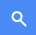
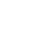
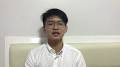

In [4]:
soup

In [5]:
len(soup)

2

In [6]:
links

['/url?q=https://www.youtube.com/channel/UCV7-zeE6PpQBxdLVUKHRdlw&sa=U&ved=2ahUKEwiO4vvG3ebqAhWP7XMBHV59AhkQFjAAegQICxAB&usg=AOvVaw3m6N6ZJaiHTWuV_4HeYTIi',
 '/url?q=https://www.youtube.com/playlist%3Flist%3DUUV7-zeE6PpQBxdLVUKHRdlw&sa=U&ved=2ahUKEwiO4vvG3ebqAhWP7XMBHV59AhkQFjABegQICRAB&usg=AOvVaw3EFhplMgem8SlHWrvUj-6l',
 '/url?q=https://th.linkedin.com/in/vipop-lekhachinabutr-3530521ab&sa=U&ved=2ahUKEwiO4vvG3ebqAhWP7XMBHV59AhkQFjACegQICBAB&usg=AOvVaw3RZNPakPrUswDJusrcAeKq',
 '/url?q=https://th.linkedin.com/pub/dir/Vipop/%2B&sa=U&ved=2ahUKEwiO4vvG3ebqAhWP7XMBHV59AhkQFjADegQIChAB&usg=AOvVaw11x5MWRVSyQMYj5-EijI1j',
 '/url?q=http://leaderteacher.ipst.ac.th/index.php/component/zoo/item/%25E0%25B8%25A7%25E0%25B8%25B4%25E0%25B8%25A0%25E0%25B8%259E%2520%25E0%25B9%2580%25E0%25B8%25A5%25E0%25B8%2582%25E0%25B8%25B2%25E0%25B8%258A%25E0%25B8%25B4%25E0%25B8%2599%25E0%25B8%259A%25E0%25B8%25B8%25E0%25B8%2595%25E0%25B8%25A3&sa=U&ved=2ahUKEwiO4vvG3ebqAhWP7XMBHV59AhkQFjAEegQIBBAB&usg=AOvVaw1piLScu3Ic1luO

In [7]:
import re   

to_remove = []
clean_links = []
for i, l in enumerate(links):
    clean = re.search('\/url\?q\=(.*)\&sa',l)

    # Anything that doesn't fit the above pattern will be removed
    if clean is None:
        to_remove.append(i)
        continue
    clean_links.append(clean.group(1))

# Remove the corresponding titles & descriptions
for x in to_remove:
    del titles[x]
    del descriptions[x]

In [8]:
clean_links

['https://www.youtube.com/channel/UCV7-zeE6PpQBxdLVUKHRdlw',
 'https://www.youtube.com/playlist%3Flist%3DUUV7-zeE6PpQBxdLVUKHRdlw',
 'https://th.linkedin.com/in/vipop-lekhachinabutr-3530521ab',
 'https://th.linkedin.com/pub/dir/Vipop/%2B',
 'http://leaderteacher.ipst.ac.th/index.php/component/zoo/item/%25E0%25B8%25A7%25E0%25B8%25B4%25E0%25B8%25A0%25E0%25B8%259E%2520%25E0%25B9%2580%25E0%25B8%25A5%25E0%25B8%2582%25E0%25B8%25B2%25E0%25B8%258A%25E0%25B8%25B4%25E0%25B8%2599%25E0%25B8%259A%25E0%25B8%25B8%25E0%25B8%2595%25E0%25B8%25A3',
 'https://kzshow.info/watch/DhgfZv4Wz6U/solution-gpedit-msc-missing-windows-10-home.html',
 'https://ritvikmath.th-cam.com/',
 'https://ritvikmath.tr-cam.com/',
 'https://videogg.com/watch%3Fv%3D95PyESThw8M',
 'https://videogg.com/watch%3Fv%3Dw21s45Jo1rU',
 'https://tr-cam.com/video/DhgfZv4Wz6U/solutIon-gpedIt-msc-mIssIng-wIndows-10-home.html']

In [9]:
titles

['Vipop Lekhachinabutr - YouTube',
 'Uploads from Vipop Lekhachinabutr - YouTube',
 'vipop lekhachinabutr - Graduate Student - Mahidol University ...',
 '4 "Vipop" โพรไฟล์ | LinkedIn',
 'วิภพ เลขาชินบุตร - ระบบสารสนเทศจัดการทุน พสวท.',
 'SOLUTION - GPEDIT.MSC MISSING | WINDOWS 10 HOME - KZshow',
 'ritvikmath',
 'ritvikmath',
 'สอบการพูดในพื้นที่ชุมชน ปวริศ นิมิตรปัญญา 5902095 RA C02 - Видео',
 'สอบการพูดในที่ชุมชน นายพิเชฐ ทองมี คณะวิทยาเขตกาญจนบุรี 5924266 ...',
 'SOLUTION - GPEDIT.MSC MISSING | WINDOWS 10 HOME - TR-cam']

In [10]:
len(titles)

11

In [11]:
type(titles)

list

In [12]:
len(descriptions)

11

In [13]:
len(clean_links)

11

In [14]:
import pandas as pd

output_dict = {
'Title': titles,
'Description': descriptions,
'URL': clean_links,
}
output_df = pd.DataFrame(output_dict, columns = output_dict.keys())

output_df

,Title,Description,URL
0,Vipop Lekhachinabutr - YouTube,Watch Queue. Queue. __count__/__total__. Vipop...,https://www.youtube.com/channel/UCV7-zeE6PpQBx...
1,Uploads from Vipop Lekhachinabutr - YouTube,Uploads from Vipop Lekhachinabutr. Vipop Lekha...,https://www.youtube.com/playlist%3Flist%3DUUV7...
2,vipop lekhachinabutr - Graduate Student - Mahi...,ดูโพรไฟล์ของ vipop lekhachinabutr ที่ LinkedIn...,https://th.linkedin.com/in/vipop-lekhachinabut...
3,"4 ""Vipop"" โพรไฟล์ | LinkedIn","ดูโพรไฟล์ของมืออาชีพที่ชื่อ ""Vipop"" บน LinkedI...",https://th.linkedin.com/pub/dir/Vipop/%2B
4,วิภพ เลขาชินบุตร - ระบบสารสนเทศจัดการทุน พสวท.,"นาย วิภพ เลขาชินบุตร. vipop lekhachinabutr, 56...",http://leaderteacher.ipst.ac.th/index.php/comp...
5,SOLUTION - GPEDIT.MSC MISSING | WINDOWS 10 HOM...,"Vipop Lekhachinabutr Ай бұрын. Thanks, it's wo...",https://kzshow.info/watch/DhgfZv4Wz6U/solution...
6,ritvikmath,Vipop Lekhachinabutr 13 วันที่ผ่านมา. You're s...,https://ritvikmath.th-cam.com/
7,ritvikmath,Vipop Lekhachinabutr 6 gün önce. You're so hel...,https://ritvikmath.tr-cam.com/
8,สอบการพูดในพื้นที่ชุมชน ปวริศ นิมิตรปัญญา 5902...,5 ต.ค. 2562 · สอบการพูดในที่ชุมชน นายวิภพ เลขา...,https://videogg.com/watch%3Fv%3D95PyESThw8M
9,สอบการพูดในที่ชุมชน นายพิเชฐ ทองมี คณะวิทยาเขต...,สอบการพูดในที่ชุมชน นายวิภพ เลขาชินบุตร คณะ วิ...,https://videogg.com/watch%3Fv%3Dw21s45Jo1rU


In [15]:
# output_df.to_csv('mela.csv',index=False,encoding='utf-8')

In [16]:
# output_df.to_csv('mela.xlsx',index=False,encoding='utf-8')

In [17]:
# output_df.to_csv('ram.csv',index=False,encoding='utf-8')

In [18]:
# !pip install chardet
